In [1]:
!python --version

Python 3.9.1


In [2]:
import time
start_time = time.time()

In [3]:
# Add imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils._testing import ignore_warnings
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.svm import SVC
from sklearn.linear_model import *
from sklearn import *
from sklearn.metrics import *
from sklearn.exceptions import *

Schema:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  object 
dtypes: float64(8), int64(3), object(1)
memory usage: 1.7+ MB
None 

Shape:  (18185, 12) 

Column Statistics: 
                  id          Area  MajorAxisLength  MinorAxisLength  \
count  18185.000000  18185.000000     18185.000000     1

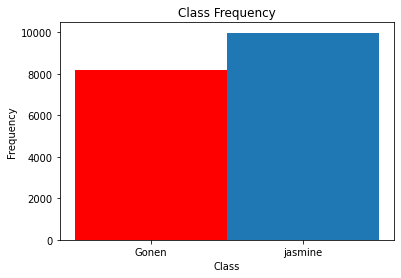

Missing values: 
 id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64


In [4]:
# Load dataset.
df = pd.read_csv("datasets/Rice-Gonen+Jasmine.csv")

# Schema
print("Schema:")
print(df.info(), "\n")

# Shape
print("Shape: ", df.shape, "\n")

# Column Statistics
print("Column Statistics: \n", df.describe(), "\n")

# Class Label Distribution
unique, counts = np.unique(df['Class'], return_counts=True)
print("Class Label Distribution:\n", "".join([i + ": " + str(c) + "\n" for i, c in zip(unique, counts)]), "\n")
bars = plt.bar(unique, counts, 1)
bars[0].set_color('r')
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Missing Value Count
print("Missing values: \n", df.isnull().sum())

In [5]:
# Drop index feature.
if len(df.columns) == 12:
    df = df.reset_index().drop(['index'], axis=1)
    df.set_index('id', inplace=True)
display(df.head())

# Encoded Class Attribute
ordinal_encoder = OrdinalEncoder()
t = pd.DataFrame(df["Class"])
df['Class']  = ordinal_encoder.fit_transform(t)
res = {}
print("\nEncoded Class Attributes: ")
for o, e in zip(t.values, df['Class'].values):
    if o[0] not in res:
        res[o[0]] = e
        print(o[0], " -> ", e)        
print()

# Train and Test Separation Through Stratified Split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=1)
for train_index, test_index in sss.split(df, df['Class'] ):
    X_train, X_test = df.iloc[train_index,:-1].to_numpy(), df.iloc[test_index,:-1].to_numpy()
    y_train, y_test = np.ravel(df['Class'].iloc[train_index]), np.ravel(df['Class'].iloc[test_index])

# Shapes of Training and Test Sets
print("Training Set Shape: X=", X_train.shape, "Y=", y_train.shape)
print("Test Set Shape: X=", X_test.shape, "Y=", y_test.shape, "\n")

# First and Last Five Class Labels
print("First 5 Label Attributes in Training: \n", y_train[:5], "\n")
print("Last 5 Label Attributes in Training: \n", y_train[-5:], "\n")

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
id,,,,,,,,,,,
1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine



Encoded Class Attributes: 
jasmine  ->  1.0
Gonen  ->  0.0

Training Set Shape: X= (12729, 10) Y= (12729,)
Test Set Shape: X= (5456, 10) Y= (5456,) 

First 5 Label Attributes in Training: 
 [1. 0. 1. 1. 0.] 

Last 5 Label Attributes in Training: 
 [1. 0. 1. 0. 0.] 



Training Logistic Regression...
Confusion Matrix:
 [[2417   43]
 [  30 2966]]
Accuracy:  0.98662
Precision:  0.98571
Recall:  0.98999
F-1 Score:  0.98784

Training SGD Classifier...
Confusion Matrix:
 [[2352  108]
 [   6 2990]]
Accuracy:  0.97911
Precision:  0.96514
Recall:  0.99800
F-1 Score:  0.98129

Training SVC Linear...
Confusion Matrix:
 [[2419   41]
 [  28 2968]]
Accuracy:  0.98735
Precision:  0.98637
Recall:  0.99065
F-1 Score:  0.98851

Training SVC Polynomial...
Confusion Matrix:
 [[2138  322]
 [  61 2935]]
Accuracy:  0.92980
Precision:  0.90114
Recall:  0.97964
F-1 Score:  0.93875

Training SVC RBF...
Confusion Matrix:
 [[2121  339]
 [  59 2937]]
Accuracy:  0.92705
Precision:  0.89652
Recall:  0.98031
F-1 Score:  0.93654

Training SVC Sigmoid...
Confusion Matrix:
 [[ 141 2319]
 [2339  657]]
Accuracy:  0.14626
Precision:  0.22077
Recall:  0.21929
F-1 Score:  0.22003



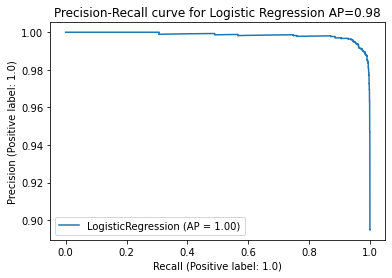

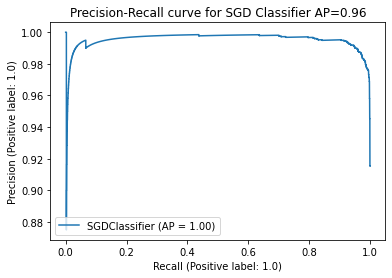

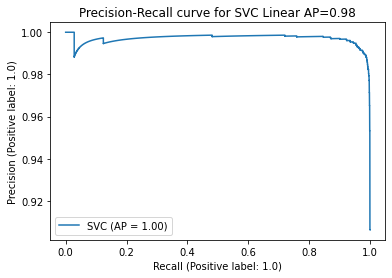

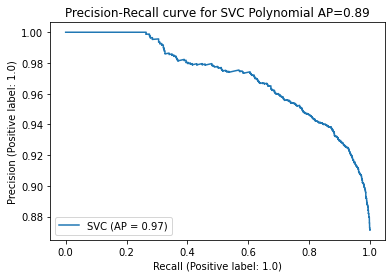

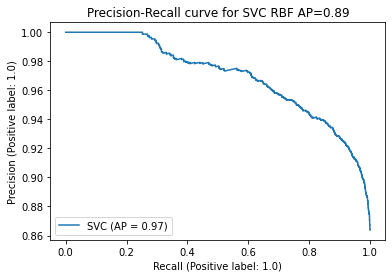

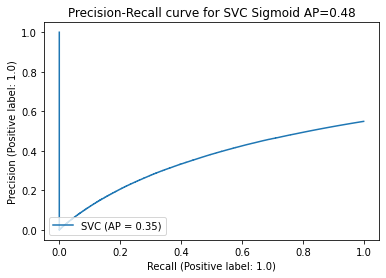

In [6]:
# This method performs training and testing in all the models.
@ignore_warnings(category=ConvergenceWarning)
def training_testing():
    # Store the models and their names in two different lists.
    models = [LogisticRegression(random_state=1), SGDClassifier(random_state=1),SVC(kernel="linear", random_state=1), SVC(kernel="poly", random_state=1), SVC(kernel="rbf", random_state=1), SVC(kernel="sigmoid", random_state=1)]
    names = ["Logistic Regression", "SGD Classifier","SVC Linear", "SVC Polynomial", "SVC RBF", "SVC Sigmoid"]
    
    # Iterate paralelly over the models objects and their names.
    for model, name in zip(models, names):
        print("Training "+ name + "...")
        model.fit(X_train, y_train) # Fit the training data.
        y_pred = model.predict(X_test) # Test the model.
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred)) # Calculate the confusion matrix of the model.
        print("Accuracy: ", "{:.5f}".format(accuracy_score(y_test, y_pred))) # Calculate the accuracy of the model.
        print("Precision: ", "{:.5f}".format(precision_score(y_test,y_pred))) # Calculate precision of the model.
        print("Recall: ", "{:.5f}".format(recall_score(y_test,y_pred))) # Calculate recall of the model.
        print("F-1 Score: ", "{:.5f}".format(f1_score(y_test, y_pred))) # Calculate f-1 score of the model.
        average_precision = average_precision_score(y_test, y_pred) # Calculate average precision of the model.
        disp = plot_precision_recall_curve(model,X_test,y_test) # Plot the precision-recall curve.
        disp.ax_.set_title('Precision-Recall curve for ' + name +
                   ' AP={0:0.2f}'.format(average_precision)) # Set the title of the plot.
        print() # Print a blank line.
        
# Invoke method to perform training and testing in all the models.   
training_testing()

0.93292


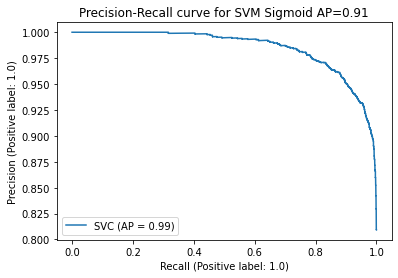

In [7]:
def preprocess_and_test():
    # Reload dataset and drop the index.
    df_3 = pd.read_csv("datasets/Rice-Gonen+Jasmine.csv")
    df_3 = df_3.reset_index().drop(['index'], axis=1)
    df_3.set_index('id', inplace=True)

    # Encode the target column, 'Class'.
    encoder = OrdinalEncoder()
    tt = pd.DataFrame(df_3["Class"])
    df_3['Class']  = encoder.fit_transform(tt)

    # Split the dataset into training and test sets.
    strat_split = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=1)

    # Scale the data in the dataset for better fit of the model.
    scale = MinMaxScaler()
    df_3 = scale.fit_transform(df_3)
    df_3 = pd.DataFrame(df_3)

    # Separate the training and test sets.
    for train_idx, test_idx in strat_split.split(df_3, df_3[10]):
        X_train_3, X_test_3 = df_3.iloc[train_idx].to_numpy(), df_3.iloc[test_idx].to_numpy()
        y_train_3, y_test_3 = np.ravel(df_3[10].iloc[train_idx]), np.ravel(df_3[10].iloc[test_idx])

    # Train and test the model.
    clf = SVC(kernel="sigmoid", random_state=1, C=100)
    clf.fit(X_train_3, y_train_3)
    y_pred_3 = clf.predict(X_test_3)
    print("{:.5f}".format(accuracy_score(y_test_3, y_pred_3))) # Accuracy of the model.
    average_precision = average_precision_score(y_test_3, y_pred_3) # Calculate average precision of the model.
    disp = plot_precision_recall_curve(clf,X_test_3,y_test_3) # Plot the precision-recall curve.
    disp.ax_.set_title('Precision-Recall curve for SVM Sigmoid' +
                       ' AP={0:0.2f}'.format(average_precision)) # Set the title of the plot.
    ### The accuracy was enhanced by scaling the data and using the parameter 'C=100'.
    
preprocess_and_test()

In [ ]:
def cross_validation(model):
    scores = cross_val_score(model, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=3)
    scores = np.sqrt(-scores)
    print(f"CV Scores Mean: {scores.mean():.4f}")
    print(f"CV Scores Standard deviation: {scores.std():.4f}")

@ignore_warnings(category=ConvergenceWarning)    
def report():
    models = [LogisticRegression(random_state=1), SGDClassifier(random_state=1),SVC(kernel="linear", random_state=1), SVC(kernel="poly", random_state=1), SVC(kernel="rbf", random_state=1), SVC(kernel="sigmoid", random_state=1)]
    names = ["Logistic Regression", "SGD Classifier","SVC Linear", "SVC Polynomial", "SVC RBF", "SVC Sigmoid"]  
    for model, name in zip(models, names):
        cv_results = cross_validate(model, X_train, y_train, cv=3)
        print(name)
        print("CV Results Keys: ", sorted(cv_results.keys()))
        print("Test Scores: ", cv_results['test_score'])
        print("Test Scores Mean: ", cv_results['test_score'].mean())
        cross_validation(model)
        print()
        
report()
print("{:.2f}".format(time.time() - start_time), "seconds elapsed.")

Logistic Regression
CV Results Keys:  ['fit_time', 'score_time', 'test_score']
Test Scores:  [0.98680179 0.99080839 0.99151544]
Test Scores Mean:  0.989708539555346
CV Scores Mean: 0.1010
CV Scores Standard deviation: 0.0100

SGD Classifier
CV Results Keys:  ['fit_time', 'score_time', 'test_score']
Test Scores:  [0.94485034 0.96888994 0.71388169]
Test Scores Mean:  0.875873988530128
CV Scores Mean: 0.3154
CV Scores Standard deviation: 0.1571

SVC Linear
CV Results Keys:  ['fit_time', 'score_time', 'test_score']
Test Scores:  [0.98750884 0.99033703 0.99127975]
Test Scores Mean:  0.9897085395553461
CV Scores Mean: 0.1011
CV Scores Standard deviation: 0.0078

SVC Polynomial
CV Results Keys:  ['fit_time', 'score_time', 'test_score']
Test Scores:  [0.91939665 0.92646712 0.93165213]
Test Scores Mean:  0.9258386361850892
CV Scores Mean: 0.2722
CV Scores Standard deviation: 0.0092

SVC RBF
CV Results Keys:  ['fit_time', 'score_time', 'test_score']
Test Scores:  [0.91868961 0.92505303 0.9302380